In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

In [3]:
# download an hour of RGB data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid="gill")

In [4]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [5]:
# set up working with the tools by just making a shorter name for our future calls
at = aurorax.tools

In [6]:
# scale all the images
#
# NOTE: you can scale all images or just one image. Because RGB data is pretty
# large, we are going to try and save some RAM when scaling the data. We use
# the `memory_saver` option with this. Note that this flag results in a slower
# scaling routine, but uses considerably less memory.
images_scaled = at.scale_intensity(data.data, min=10, max=120, memory_saver=True)

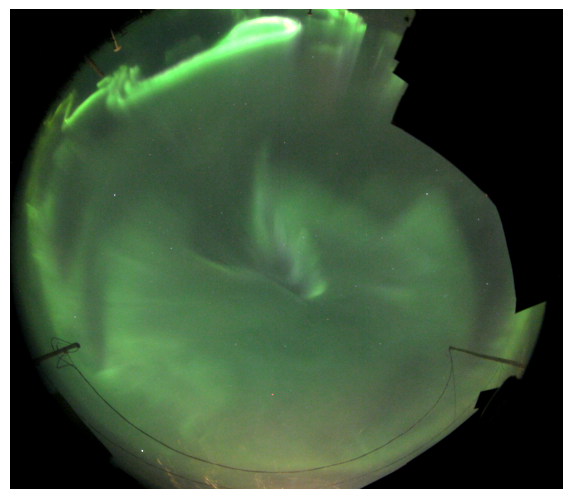

In [7]:
at.display(images_scaled[:, :, :, 600])

# Generate a keogram

In [8]:
images_scaled.shape

(480, 553, 3, 1200)

In [9]:
keogram = at.keogram.create(images_scaled, data.timestamp)

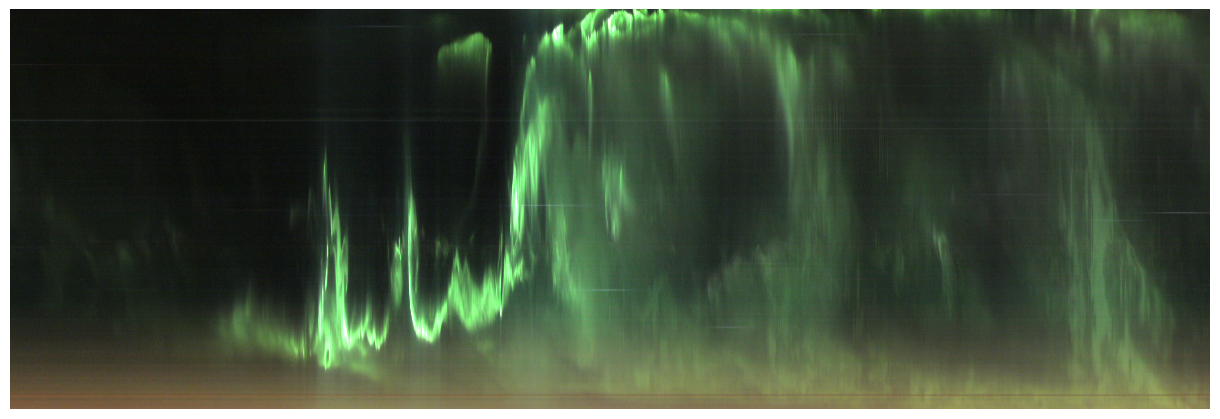

In [10]:
at.display(keogram.data, figsize=(12, 4), aspect="auto")

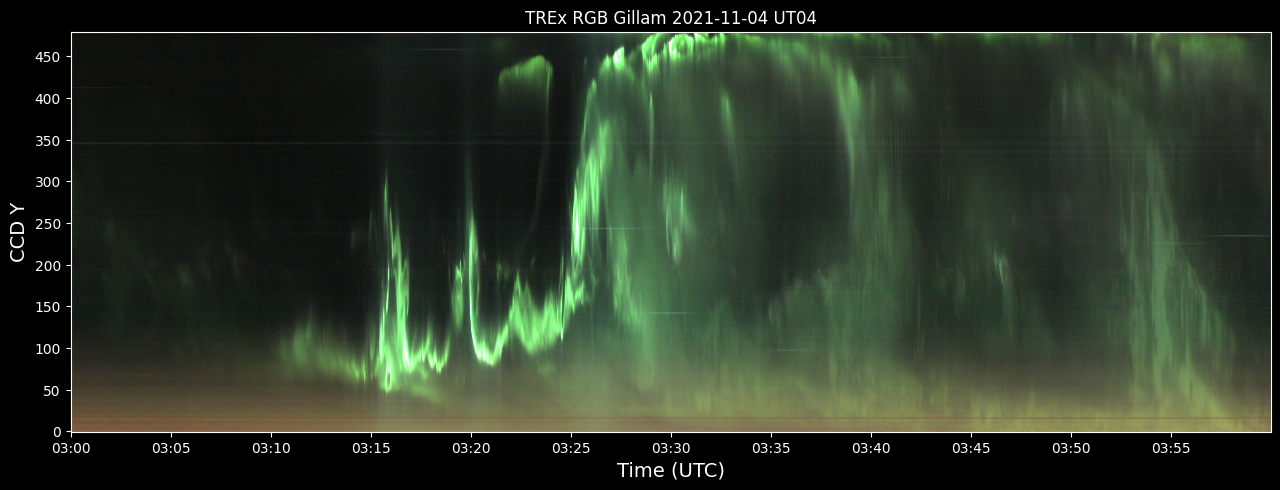

In [11]:
at.set_theme("dark")
plot_dt = start_dt  # this gets changed later, so we'll capture it now
keogram.plot(
    title="TREx RGB Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    aspect="auto",
)

# Reference in geographic coordinates

In [12]:
# download skymap files
start_dt = datetime.datetime(2020, 1, 1)
end_dt = datetime.datetime(2022, 1, 1)
r = aurorax.data.ucalgary.download("TREX_RGB_SKYMAP_IDLSAV", start_dt, end_dt, site_uid="gill", overwrite=True)
r.filenames

[PosixPath('/home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20200723/rgb_skymap_gill_20200723-+_v01.sav'),
 PosixPath('/home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20210726/rgb_skymap_gill_20210726-+_v01.sav'),
 PosixPath('/home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20211214/rgb_skymap_gill_20211214-+_v01.sav')]

In [13]:
# we want to use the second last one, since that's for the time period of the data we're looking at
skymaps = aurorax.data.ucalgary.read(r.dataset, r.filenames[-2])
skymaps.data[0].pretty_print()

Skymap:
  filename               : /home/darrenc/pyaurorax_data/TREX_RGB_SKYMAP_IDLSAV/gill/gill_20210726/rgb_skymap_gill_20210726-+_v01.sav
  full_azimuth           : array(dims=(480, 553), dtype=>f4)
  full_elevation         : array(dims=(480, 553), dtype=>f4)
  full_map_altitude      : array(dims=(3,), dtype=>f4)
  full_map_latitude      : array(dims=(3, 481, 554), dtype=>f4)
  full_map_longitude     : array(dims=(3, 481, 554), dtype=>f4)
  generation_info        : SkymapGenerationInfo(...)
  get_precalculated_altitudes: <bound method Skymap.get_precalculated_altitudes of Skymap(project_uid=rgb, site_uid=gill, imager_uid=rgb-04, site_map_latitude=56.376724, site_map_longitude=265.356323, ...)>
  imager_uid             : rgb-04
  project_uid            : rgb
  site_map_altitude      : 0.0
  site_map_latitude      : 56.376724
  site_map_longitude     : 265.35632
  site_uid               : gill
  version                : v01


In [14]:
keogram.set_geographic_latitudes(skymaps.data[0], altitude=120)

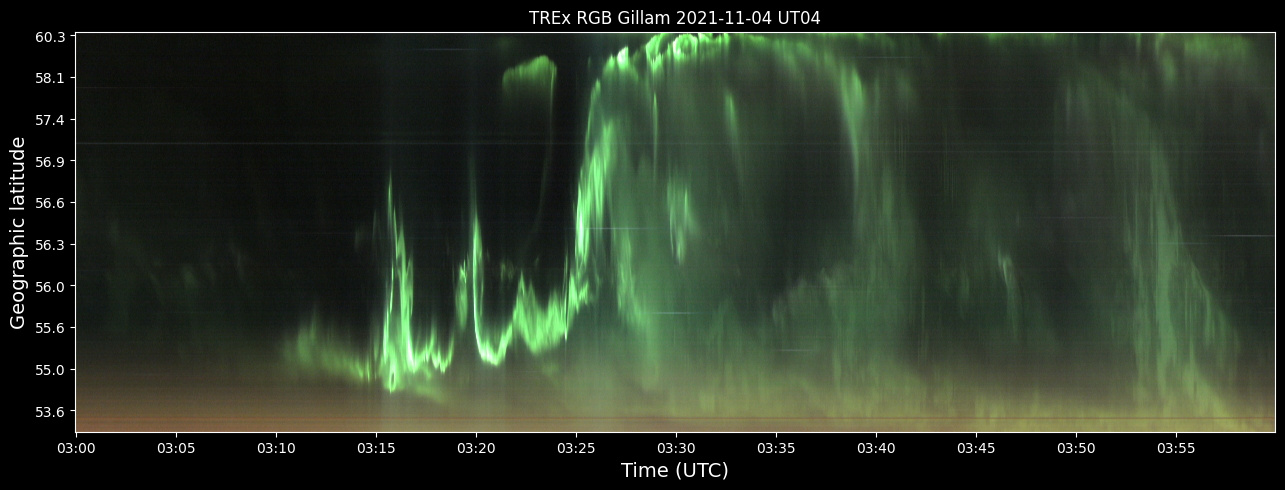

In [15]:
keogram.plot(
    figsize=(12, 4),
    y_type="geo",
    aspect="auto",
    title="TREx RGB Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
)

In [16]:
keogram.set_magnetic_latitudes(skymaps.data[0], plot_dt, altitude=120)

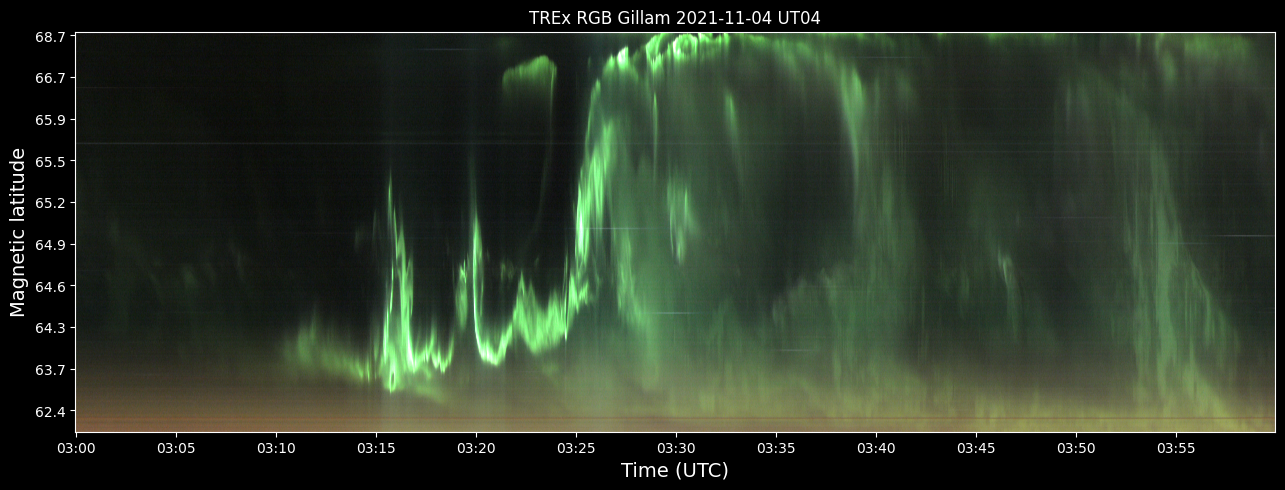

In [17]:
keogram.plot(
    figsize=(12, 4),
    y_type="mag",
    aspect="auto",
    title="TREx RGB Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
)